In [30]:
# matplotlib notebook
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import os

In [31]:
import matplotlib

In [32]:
datadir = '/home/tamarnat/code/SPEC2006/'
plotdir = datadir + 'plots/o3/test/'
# datadir = '/run/user/1000/gvfs/sftp:host=amarillo.cs.ucdavis.edu/home/tamarnat/VRG-experiments/results/microbench/'

In [33]:
cpus = ['kvm', 'atomic', 'timing', 'o3']
datasize = ['test', 'ref']

In [34]:
# SPEC2006 Benchmarks
all_spec2006_benchmarks = ['401.bzip2', '403.gcc', '410.bwaves', '416.gamess', '429.mcf', '433.milc', '434.zeusmp', 
                       '435.gromacs', '436.cactusADM', '437.leslie3d', '444.namd', '445.gobmk','453.povray', 
                       '454.calculix', '456.hmmer', '458.sjeng', '459.GemsFDTD','462.libquantum', '464.h264ref',
                       '465.tonto', '470.lbm', '471.omnetpp', '473.astar', '481.wrf', '482.sphinx3', '998.specrand',
                       '999.specrand']

spec2006int=['401.bzip2','403.gcc','429.mcf','456.hmmer','458.sjeng','462.libquantum','471.omnetpp']

spec2006flt=['410.bwaves','416.gamess','433.milc','435.gromacs','436.cactusADM','437.leslie3d','444.namd',
             '453.povray','454.calculix','459.GemsFDTD','465.tonto','470.lbm','481.wrf','482.sphinx3']
# kvm_benchmarks = os.listdir(datadir + 'results/' + cpus[0] + '/' + datasize[0] + '/' )
# kvm_benchmarks.sort()
# atomic_benchmarks = os.listdir(datadir + 'results/' + cpus[1] + '/' + datasize[0] + '/' )
# atomic_benchmarks.sort()
# timing_benchmarks = os.listdir(datadir + 'results/' + cpus[2] + '/' + datasize[0] + '/' )
# timing_benchmarks.sort()
# o3_benchmarks = os.listdir(datadir + 'results/' + cpus[3] + '/' + datasize[0] + '/' )
# o3_benchmarks.sort()

In [35]:
# function to extract stats
def gem5GetStat(filename, stat):
    filename = os.path.join(datadir, '', filename, 'stats.txt').replace('\\','/')
    with open(filename) as f:
        r = f.read()
        if len(r) < 10: return 0.0
        start = r.find(stat) + len(stat) + 1
        end = r.find('#', start)
        return float(r[start:end])

In [36]:
# for root,dirs,files in os.walk(datadir + 'results'):
#     print('root:')
#     print(root)
#     print('dirs:')
#     print(dirs)
#     #print(files)

In [37]:
# data frame for KVM CPU
rows = []
for size in datasize:
    cdir = datadir + 'results/' + cpus[0] + '/' + size + '/'
    kvm_benchmarks = os.listdir(cdir)
    kvm_benchmarks.sort()
    kvm_benchmarks.remove('434.zeusmp')
    kvm_benchmarks.remove('445.gobmk')
    kvm_benchmarks.remove('464.h264ref')
    for bm in kvm_benchmarks:
        rows.append([size, bm,
                         gem5GetStat(cdir + bm, 'sim_ticks')/435, #1000
                         gem5GetStat(cdir + bm, 'sim_insts'),
                         gem5GetStat(cdir + bm, 'sim_ops'),
                         gem5GetStat(cdir + bm, 'sim_ticks')/1e12,
                         gem5GetStat(cdir + bm, 'host_seconds')])

df_kvm = pd.DataFrame(rows, columns=['data_size', 'benchmark','cycles', 'instructions', 'ops', 'sim_time', 'host_seconds'])
df_kvm['host_mins'] = df_kvm['host_seconds']/60
df_kvm['host_hours'] = df_kvm['host_seconds']/3600
df_kvm['insts_per_billion'] = df_kvm['instructions']/1000000000
df_kvm['ipc'] = df_kvm['instructions']/df_kvm['cycles']
df_kvm['cpi'] = df_kvm['cycles']/df_kvm['instructions']
df_kvm['opc'] = df_kvm['ops']/df_kvm['cycles']

In [38]:
# data frame for Atomic CPU
rows = []
temp = ['test']
for size in temp:
    cdir = datadir + 'results/' + cpus[1] + '/' + size + '/'
    atomic_benchmarks = os.listdir(cdir)
    atomic_benchmarks.sort()
    atomic_benchmarks.remove('434.zeusmp')
    atomic_benchmarks.remove('445.gobmk')
    atomic_benchmarks.remove('464.h264ref')
    for bm in atomic_benchmarks:
        rows.append([size, bm,
                         gem5GetStat(cdir + bm, 'sim_ticks')/435, #1000
                         gem5GetStat(cdir + bm, 'sim_insts'),
                         gem5GetStat(cdir + bm, 'sim_ops'),
                         gem5GetStat(cdir + bm, 'sim_ticks')/1e12,
                         gem5GetStat(cdir + bm, 'host_seconds')])

df_atomic = pd.DataFrame(rows, columns=['data_size','benchmark','cycles', 'instructions', 'ops', 'sim_time', 'host_seconds'])
df_atomic['host_mins'] = df_atomic['host_seconds']/60
df_atomic['host_hours'] = df_atomic['host_seconds']/3600
df_atomic['insts_per_billion'] = df_atomic['instructions']/1000000000
df_atomic['ipc'] = df_atomic['instructions']/df_atomic['cycles']
df_atomic['cpi'] = df_atomic['cycles']/df_atomic['instructions']
df_atomic['opc'] = df_atomic['ops']/df_atomic['cycles']


In [39]:
# data frame for Timing CPU
rows = []
temp = ['test']
for size in temp:
    cdir = datadir + '/results/' + cpus[2] + '/' + size + '/'
    timing_benchmarks = os.listdir(cdir)
    timing_benchmarks.sort()
    timing_benchmarks.remove('434.zeusmp')
    timing_benchmarks.remove('445.gobmk')
    timing_benchmarks.remove('464.h264ref')
    for bm in timing_benchmarks:
        rows.append([size, bm,
                         gem5GetStat(cdir + bm, 'sim_ticks')/435, #1000
                         gem5GetStat(cdir + bm, 'sim_insts'),
                         gem5GetStat(cdir + bm, 'sim_ops'),
                         gem5GetStat(cdir + bm, 'sim_ticks')/1e12,
                         gem5GetStat(cdir + bm, 'host_seconds'),
                         gem5GetStat(cdir + bm, 'system.detailed_cpu.numCycles'),
                         gem5GetStat(cdir + bm, 'system.detailed_cpu.committedInsts')])

df_timing = pd.DataFrame(rows, columns=['data_size','benchmark','total_cycles', 'total_instructions', 'ops',
                                        'sim_time','host_seconds', 'cycles', 'instructions'])
df_timing['host_mins'] = df_timing['host_seconds']/60
df_timing['host_hours'] = df_timing['host_seconds']/3600
df_timing['insts_per_billion'] = df_timing['instructions']/1000000000
df_timing['cpi'] = df_timing['cycles']/df_timing['instructions']

In [102]:
# data frame for O3 CPU
rows = []
temp = ['test']
for size in temp:
    cdir = datadir + '/results/' + cpus[3] + '/' + size + '/'
    o3_benchmarks = os.listdir(cdir)
    o3_benchmarks.sort()
    o3_benchmarks.remove('434.zeusmp')
    o3_benchmarks.remove('445.gobmk')
    o3_benchmarks.remove('464.h264ref')
            
    for bm in o3_benchmarks:
        rows.append([size, bm,
                     gem5GetStat(cdir + bm, 'sim_ticks')/435, #1000
                     gem5GetStat(cdir + bm, 'sim_insts'),
                     gem5GetStat(cdir + bm, 'sim_ops'),
                     gem5GetStat(cdir + bm, 'sim_ticks')/1e12,
                     gem5GetStat(cdir + bm, 'host_seconds'),
                     gem5GetStat(cdir + bm, 'system.detailed_cpu.cpi'),
                     gem5GetStat(cdir + bm, 'system.detailed_cpu.commit.committedInsts'),
                     gem5GetStat(cdir + bm, 'system.cpu.dcache.overall_accesses::total'),
                     gem5GetStat(cdir + bm, 'system.cpu.dcache.overall_miss_rate::total')*100,
                     gem5GetStat(cdir + bm, 'system.cpu.l2cache.overall_accesses::.detailed_cpu.data'),
                     gem5GetStat(cdir + bm, 'system.cpu.l2cache.overall_miss_rate::total')*100,
                     gem5GetStat(cdir + bm, 'system.l3cache.overall_accesses::total'),
                     gem5GetStat(cdir + bm, 'system.l3cache.overall_miss_rate::total')*100,
                     gem5GetStat(cdir + bm, 'system.detailed_cpu.iew.iewIQFullEvents'),
                     gem5GetStat(cdir + bm, 'system.detailed_cpu.iew.iewBlockCycles'),
                     gem5GetStat(cdir + bm, 'system.detailed_cpu.timesIdled'),
                     gem5GetStat(cdir + bm, 'system.detailed_cpu.fetch.branchRate'),
                     gem5GetStat(cdir + bm, 'system.detailed_cpu.fetch.Cycles'),
                     gem5GetStat(cdir + bm, 'system.detailed_cpu.fetch.MiscStallCycles'),
                     gem5GetStat(cdir + bm, 'system.detailed_cpu.fetch.PendingTrapStallCycles'),
                     gem5GetStat(cdir + bm, 'system.detailed_cpu.fetch.SquashCycles'),
                     gem5GetStat(cdir + bm, 'system.detailed_cpu.fetch.TlbCycles'),
                     gem5GetStat(cdir + bm, 'system.detailed_cpu.fetch.icacheStallCycles'),
                     gem5GetStat(cdir + bm, 'system.detailed_cpu.numCycles'),
                     gem5GetStat(cdir + bm, 'system.detailed_cpu.iew.exec_rate'),
                     gem5GetStat(cdir + bm, 'system.detailed_cpu.iew.wb_rate'),
                     gem5GetStat(cdir + bm, 'system.detailed_cpu.commit.committed_per_cycle::mean')])
        
        
        
#         system.detailed_cpu.fetch.rate
        
        
        
        
#         system.detailed_cpu.iew.exec_rate
        
        
        

df_o3 = pd.DataFrame(rows, columns=['data_size', 'benchmark','cycles', 'total_instructions', 'ops', 'sim_time', 
                                    'host_seconds', 'cpi', 'instructions', 'dcache_overall_accesses','dcache_miss_rate',
                                    'l2cache_overall_accesses','l2cache_miss_rate', 'l3cache_overall_accesses',
                                    'l3cache_miss_rate','iewIQFullEvents', 'iewBlockCycles', 'timesIdled', 'branchRate',
                                    'fetch_Cycles', 'fetch_MiscStallCycles','fetch_PendingQuiesceStallCycle','fetch_SquashCycles',
                                   'fetch_lbCycles', 'fetch_icacheStallCycles', 'cpu_cycles', 'exec_rate', 'wb_rate', 'commit_rate'])
df_o3['host_mins'] = df_o3['host_seconds']/60
df_o3['host_hours'] = df_o3['host_seconds']/3600
df_o3['insts_per_billion'] = df_o3['instructions']/1000000000
df_o3['overall_cache_accesses'] = df_o3['dcache_overall_accesses'] + df_o3['l2cache_overall_accesses'] + df_o3['l3cache_overall_accesses']
df_o3['dcache_overall_accesses_per'] = df_o3['dcache_overall_accesses']/df_o3['overall_cache_accesses']
df_o3['l2cache_overall_accesses_per'] = df_o3['l2cache_overall_accesses']/df_o3['overall_cache_accesses']
df_o3['l3cache_overall_accesses_per'] = df_o3['l3cache_overall_accesses']/df_o3['overall_cache_accesses']
df_o3['dcache_hit_rate'] = 100 - df_o3['dcache_miss_rate']
df_o3['l2cache_hit_rate'] = 100 - df_o3['l2cache_miss_rate']
df_o3['l3cache_hit_rate'] = 100 - df_o3['l3cache_miss_rate']
df_o3['fetch_time'] = (df_o3['fetch_Cycles'] + df_o3['fetch_MiscStallCycles'] + df_o3['fetch_PendingQuiesceStallCycle'] + df_o3['fetch_SquashCycles'] + df_o3['fetch_lbCycles'] + df_o3['fetch_icacheStallCycles'])/df_o3['cpu_cycles']
df_o3['fetch_real'] = df_o3['fetch_Cycles']/1e12
df_o3['cpu_time'] = (df_o3['cpu_cycles']/1e12)*590

In [41]:
# # 'r*--' red stars with dashed line
# # 'ks.' black squares with dotted line
# # 'bD-.': blue diamonds with dash-dot line
# def plot_multi_line(data_size, cpu, benchmarks, stat1, stat2, norm=True):
#     data_frame = df_atomic
#     plt.figure()
#     i = 0
#     sizes = [data_size]
#     for size in sizes:
#         for bench in benchmarks:
#             if norm: 
#                 base = data_frame[(data_frame['data_size']==size)][stat].iloc[0]
#             else: base = 1
#             a = data_frame[(data_frame['benchmark']==bench) & (data_frame['data_size']==size)]
#             #plt.plot(i, a[stat].iloc[0]/base, 'go-')
#             plt.plot(data_frame['benchmark'], data_frame[stat1], 'go-')
#             plt.plot(data_frame['benchmark'], data_frame[stat2], 'r*--')
#             i += 1
    
#     plt.xticks(np.arange(len(benchmarks)+1), benchmarks, rotation=40, ha='right')

In [42]:
# data_size = 'test'
# stat1 = 'cpi'
# stat2 = 'ipc'
# plot_title = 'simulation time'
# ylabel = 'seconds'
# cpu = 'atomic'

# # plot function
# plot_multi_line(data_size, cpu, atomic_benchmarks, stat1, stat2, norm=False)

# # plot parameters
# fig_size = plt.rcParams["figure.figsize"]
# fig_size[0] = 10
# fig_size[1] = 5 
# plt.rcParams["figure.figsize"] = fig_size

# plt.ylabel(ylabel)
# plt.title(plot_title)

# # plot directory
# newplot =  plotdir + cpu + '/' + data_size + '/' 
# # plt.legend(loc=1, prop={'size': 8})

# plt.tight_layout()
# plt.savefig(newplot + stat1 + '.png', format='png', dpi=600)

In [43]:
# def sublplot_bar(cpus, benchmarks, stat, ax1_title, ax2_title, ax1_ylabel, ax2_ylabel):
#     # Create Figure and Subplots
#     figure, (ax1, ax2) = plt.subplots(1,2, sharey=False, dpi=120)

#     # Plot
#     i = 0
#     for cpu in cpus:
#         for j, bench in enumerate(kvm_benchmarks):
#             a = df1[(df1['benchmark']==bench) & (df1['cpu']==cpu)]
#             b = df2[(df2['benchmark']==bench) & (df2['cpu']==cpu)]
#             ax1.bar(i, a[stat].iloc[0], color= 'gray')
#             ax2.bar(i, b[stat].iloc[0], color= 'gray')
#             i += 1
            
#     # Title, X and Y labels  
#     x = np.arange(len(kvm_benchmarks)+1)
#     ax1.set_xticks(x);ax2.set_xticks(x)
#     ax1.set_xticklabels(kvm_benchmarks, rotation=40, ha='right');ax2.set_xticklabels(kvm_benchmarks, rotation=40, ha='right')
#     ax1.set_ylabel(ax1_ylabel);ax2.set_ylabel(ax2_ylabel)
#     ax1.set_title(ax1_title);ax2.set_title(ax2_title);

In [44]:
# def plot_bar(data_size, cpu, benchmarks, stat1, stat2, stat3, norm=True):
#     data_frame = df_o3
#     plt.figure()
#     i = 0
#     N = [x for x, _ in enumerate(benchmarks)]
#     sizes = [data_size]
#     array1 = []
#     array2 = []
#     array3 = []
#     for size in sizes:
#         for bench in benchmarks:
#             if norm: 
#                 base = data_frame[(data_frame['data_size']==size)][stat].iloc[0]
#             else: base = 1
#             a = data_frame[(data_frame['benchmark']==bench) & (data_frame['data_size']==size)]
# #             plt.bar(i, a[stat1].iloc[0]/base, color='red')
# #             plt.bar(i, a[stat2].iloc[0]/base, color='orange')
# #             plt.bar(i, a[stat3].iloc[0]/base, color='yellow')
#             array1.append(a[stat1].iloc[0])
#             array2.append(a[stat2].iloc[0])
#             array3.append(a[stat3].iloc[0])

            
#     print(array1)
#     print(array2)
#     print(array3)
#     plt.bar(N, array1, width=0.8, label='dcache', color='gold')
#     plt.bar(N, array2, width=0.8, label='l2cache', color='silver', bottom=array1)
#     plt.bar(N, array3, width=0.8, label='l3cache', color='#CD853F', bottom=array2+array1 )

#     plt.xticks(N, benchmarks, rotation=40, ha='right')

In [45]:
# data_size = 'test'
# stat1 = 'dcache_overall_accesses_per'
# stat2 = 'l2cache_overall_accesses_per'
# stat3 = 'l3cache_overall_accesses_per'
# plot_title = 'Cache access'
# ylabel = ''
# cpu = 'o3'

# # plot function
# plot_bar(data_size, cpu, atomic_benchmarks[:5], stat1, stat2, stat3, norm=False)

# # plot parameters
# fig_size = plt.rcParams["figure.figsize"]
# fig_size[0] = 10
# fig_size[1] = 5
# plt.rcParams["figure.figsize"] = fig_size

# plt.ylabel(ylabel)
# plt.title(plot_title)

# # plot directory
# newplot =  plotdir + cpu + '/' + data_size + '/' 
# # plt.legend(loc=1, prop={'size': 8})

# plt.tight_layout()
# plt.savefig(newplot + stat + '.png', format='png', dpi=600)

In [46]:
# def plot_bar(data_size, cpu, benchmarks, stat1, stat2, stat3, norm=True):
#     data_frame = df_o3
#     plt.figure()
#     i = 0
#     N = [x for x, _ in enumerate(benchmarks)]
#     sizes = [data_size]
#     array1 = []
#     array2 = []
#     array3 = []
#     for size in sizes:
#         for bench in benchmarks:
#             if norm: 
#                 base = data_frame[(data_frame['data_size']==size)][stat].iloc[0]
#             else: base = 1
#             a = data_frame[(data_frame['benchmark']==bench) & (data_frame['data_size']==size)]
#             array1.append(a[stat1].iloc[0])
#             array2.append(a[stat2].iloc[0])
#             array3.append(a[stat3].iloc[0])

            
#     print(array1)
#     print(array2)
#     print(array3)
#     plt.bar(N, array1, width=0.8, label='dcache', color='gold')
#     plt.bar(N, array2, width=0.8, label='l2cache', color='silver', bottom=array1)
#     plt.bar(N, array3, width=0.8, label='l3cache', color='#CD853F', bottom=array2+array1 )

#     plt.xticks(N, benchmarks, rotation=40, ha='right')

In [47]:
# stat1 = 'dcache_hit_rate'
# stat2 = 'l2cache_hit_rate'
# stat3 = 'l3cache_hit_rate'
# stat4 = 'dcache_miss_rate'
# stat5 = 'l2cache_miss_rate'
# stat6 = 'l3cache_miss_rate'
# plot_title = 'O3 CPU Cache Hit Rates'
# ylabel = ''
# data_frame = df_o3
# benchmarks = o3_benchmarks
# array1 = []; array2 = []; array3 = []; array4 = []; array5 = []; array6 = []
# plt.figure()
# plt.figure(figsize=(20,8))
# N = np.arange(len(benchmarks))
# barwidth = 0.2
# displacement1 = N + barwidth
# displacement2 = displacement1 + barwidth
# for bench in benchmarks:
#     a = data_frame[(data_frame['benchmark']==bench)]
#     array1.append(a[stat1].iloc[0])
#     array2.append(a[stat2].iloc[0])
#     array3.append(a[stat3].iloc[0])
#     array4.append(a[stat4].iloc[0])
#     array5.append(a[stat5].iloc[0])
#     array6.append(a[stat6].iloc[0])

# plt.bar(N, array1, barwidth, label='L1 D cache', color='royalblue')
# plt.bar(displacement1, array2, barwidth, label='L2 cache', color='cornflowerblue')
# plt.bar(displacement2, array3, barwidth, label='L3 cache', color='lightsteelblue')
# # plt.bar(N, array4, displacement, label='miss rate', color='red', bottom=array1)
# # plt.bar(N, array5, displacement, label='miss rate', color='red', bottom=array2)
# # plt.bar(N, array6, displacement, label='miss rate', color='red', bottom=array3)


# # print(array1)
# # print(array2)
# # print(array3)
# # print(array4)
# # print(array5)
# # print(array6)

# plt.title(plot_title)
# plt.legend(bbox_to_anchor=(1.1, 1.05))
# plt.xticks(N+0.2, benchmarks, rotation=40, ha='right')
# plt.tight_layout()
# plt.savefig(plotdir + plot_title + '.png', format='png', dpi=600)

In [48]:
# stat = 'sim_time'
# df_atomic['perf'] = (df_kvm[stat]/df_atomic[stat])*100
# df_timing['perf'] = (df_kvm[stat]/df_timing[stat])*100
# df_o3['perf'] = (df_kvm[stat]/df_o3[stat])*100

# frame_select = {'kvm': df_kvm, 'atomic': df_atomic, 'timing': df_timing, 'o3': df_o3}

# types = [spec2006int, spec2006flt]

# plot_title = 'Performance relative to native linux'
# N = np.arange(len(types))
# barwidth = 0.2
# displacement1 = N + barwidth
# displacement2 = displacement1 + barwidth

# a=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
# i=0
# for i, typ in enumerate(types):
#     for bench in typ:
#         data1 = df_atomic[(df_atomic['benchmark']==bench)]
#         a[i] = a[i]+ data1['perf'].iloc[0]
#     a[i] /= len(typ)
#     i+=1

# b=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
# i=0
# for i, typ in enumerate(types):
#     for bench in typ:
#         data1 = df_timing[(df_timing['benchmark']==bench)]
#         b[i] = b[i]+ data1['perf'].iloc[0]
#     b[i] /= len(typ)
#     i+=1
    
# c=[0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0]
# i=0
# for i, typ in enumerate(types):
#     for bench in typ:
#         data1 = df_o3[(df_o3['benchmark']==bench)]
#         c[i] = c[i]+ data1['perf'].iloc[0]
#     c[i] /= len(typ)
#     i+=1

    
# print(a)
# print(b)
# print(c)
# plt.bar(N, a[:2], barwidth, label='Atomic CPU', color='royalblue')
# plt.bar(displacement1, b[:2], barwidth, label='Timing CPU', color='cornflowerblue')
# plt.bar(displacement2, c[:2], barwidth, label='O3 CPU', color='lightsteelblue') 

# plt.title(plot_title)
# plt.legend(bbox_to_anchor=(1.1, 1.05))
# cat = ['SPEC2006Int', 'SPEC2006Float']
# plt.xticks(N+0.2, cat, rotation=40, ha='right')
# plt.tight_layout()
# plt.savefig(plotdir + plot_title + '.png', format='png', dpi=600)

<Figure size 432x288 with 0 Axes>

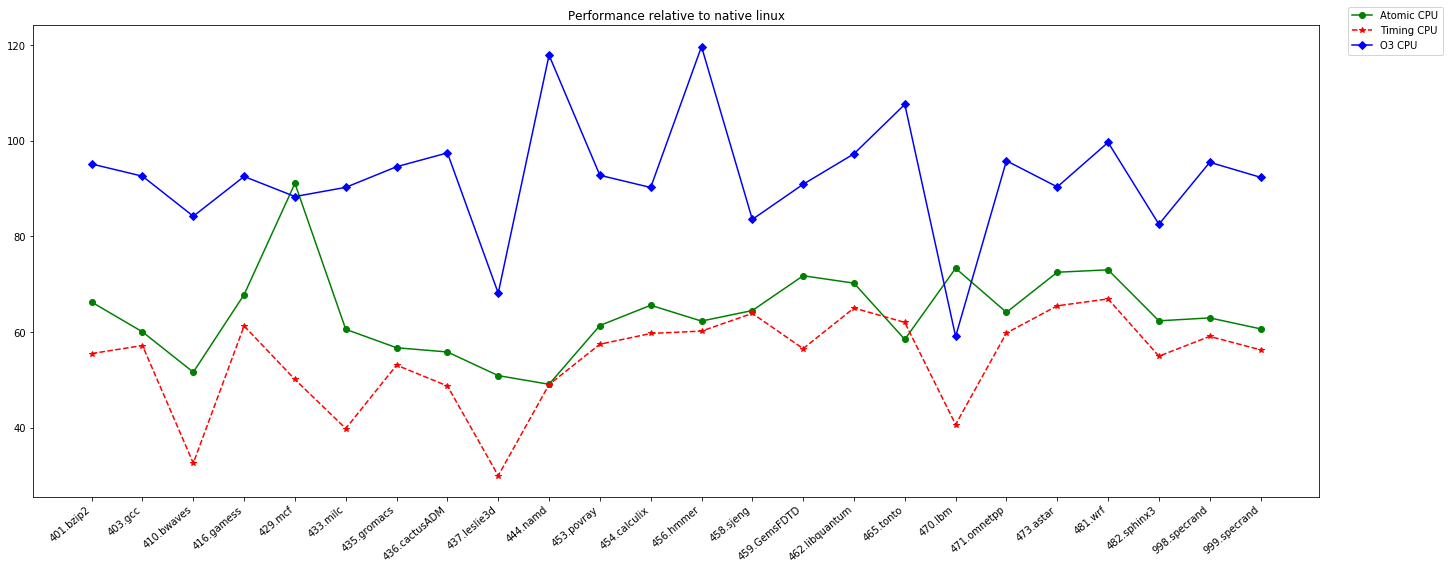

In [53]:
stat = 'sim_time'
df_atomic['perf'] = (df_kvm[stat]/df_atomic[stat])*100
df_timing['perf'] = (df_kvm[stat]/df_timing[stat])*100
df_o3['perf'] = (df_kvm[stat]/df_o3[stat])*100

plt.figure()
plt.figure(figsize=(20,8))
plot_title = 'Performance relative to native linux'
N = np.arange(len(o3_benchmarks))
plt.plot(N,df_atomic['perf'], 'go-', label='Atomic CPU')
plt.plot(N,df_timing['perf'], 'r*--', label='Timing CPU')
plt.plot(N,df_o3['perf'], 'bD-', label='O3 CPU')
plt.xticks(N, o3_benchmarks, rotation=40, ha='right')
plt.title(plot_title)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
plt.savefig(plotdir + 'perf_all_benchs' + '.png', format='png', dpi=600)

<Figure size 432x288 with 0 Axes>

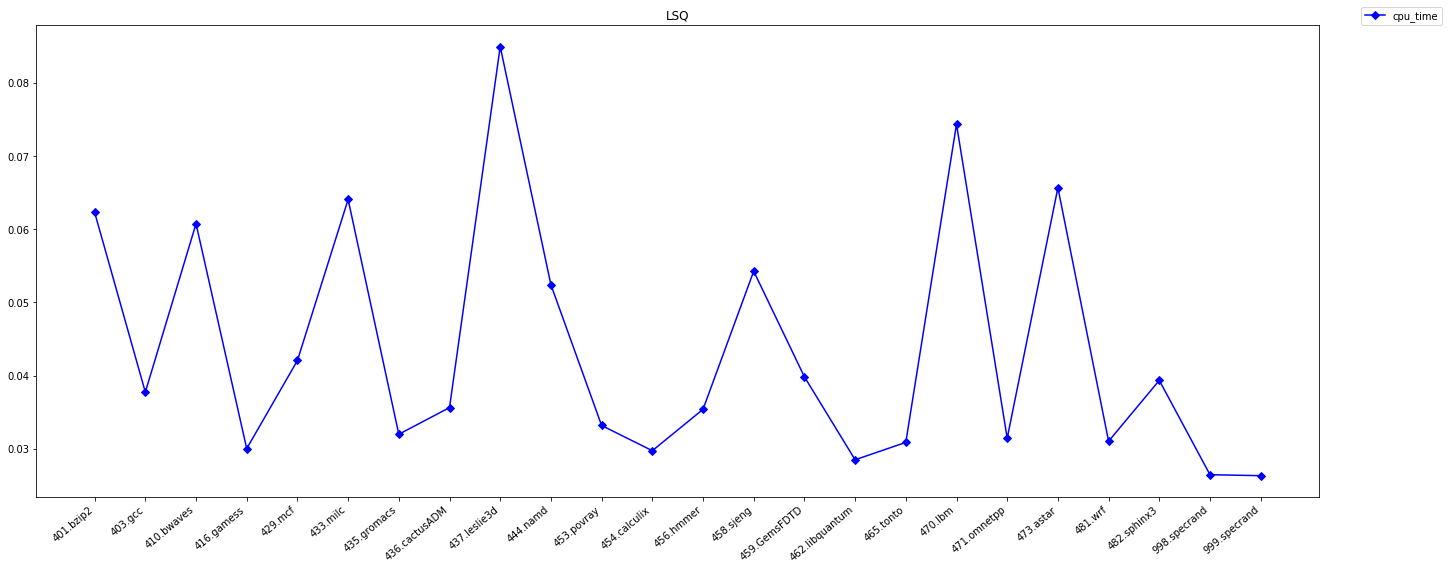

In [99]:
stat = 'cpu_time'
plt.figure()
plt.figure(figsize=(20,8))
plot_title = 'LSQ'
N = np.arange(len(o3_benchmarks))
plt.plot(N,df_o3[stat], 'bD-')
plt.xticks(N, o3_benchmarks, rotation=40, ha='right')
plt.title(plot_title)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
plt.savefig(plotdir + 'iewBlockCycles' + '.png', format='png', dpi=600)

<Figure size 432x288 with 0 Axes>

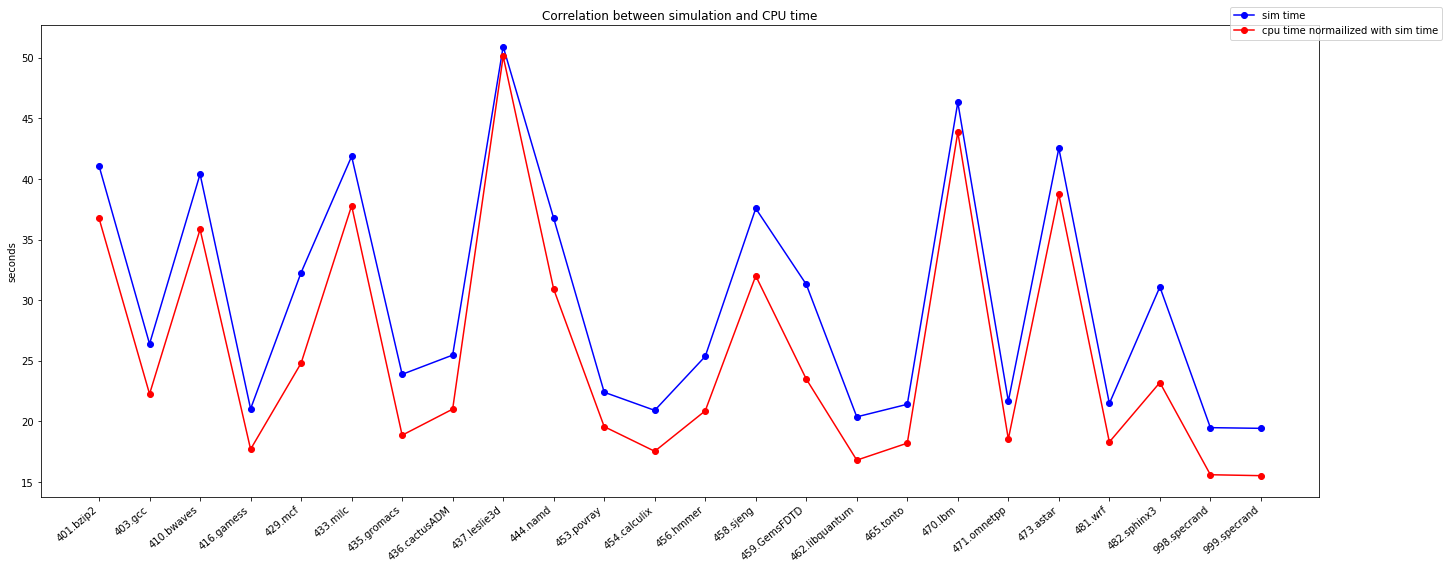

In [120]:
stat1 = 'sim_time'
stat2 = 'cpu_time'
plt.figure()
df_o3[stat1] = df_o3[stat1]+1
plt.figure(figsize=(20,8))
plot_title = 'Correlation between simulation and CPU time'
N = np.arange(len(o3_benchmarks))
plt.plot(N,df_o3[stat1], 'bo-', label = 'sim time')
plt.plot(N,df_o3[stat2], 'ro-', label = 'cpu time normailized with sim time')
plt.xticks(N, o3_benchmarks, rotation=40, ha='right')
plt.title(plot_title)
plt.ylabel('seconds')
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
plt.savefig(plotdir + stat + '.png', format='png', dpi=600)

<Figure size 432x288 with 0 Axes>

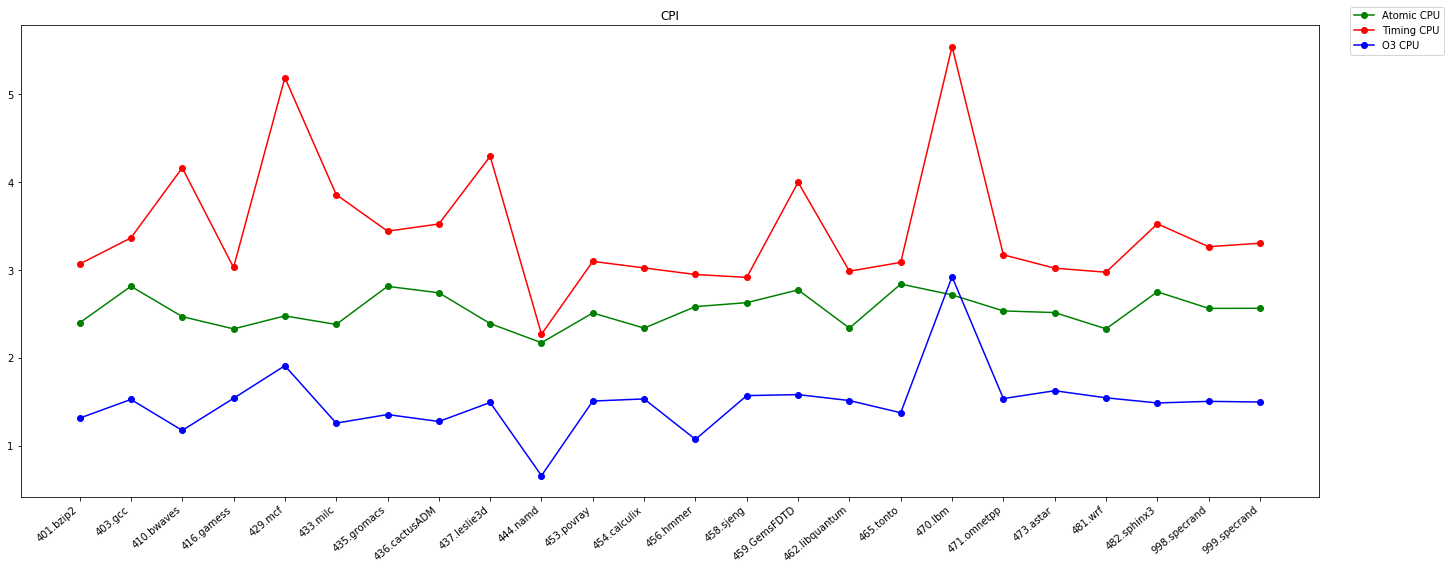

In [64]:
stat = 'cpi'
plt.figure()
plt.figure(figsize=(20,8))
plot_title = 'CPI'
N = np.arange(len(o3_benchmarks))
plt.plot(N,df_atomic[stat], 'go-', label='Atomic CPU')
plt.plot(N,df_timing[stat], 'ro-', label='Timing CPU')
plt.plot(N,df_o3[stat], 'bo-', label='O3 CPU')
plt.xticks(N, o3_benchmarks, rotation=40, ha='right')
plt.title(plot_title)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
plt.savefig(plotdir + 'cpi_all' + '.png', format='png', dpi=600)

<Figure size 432x288 with 0 Axes>

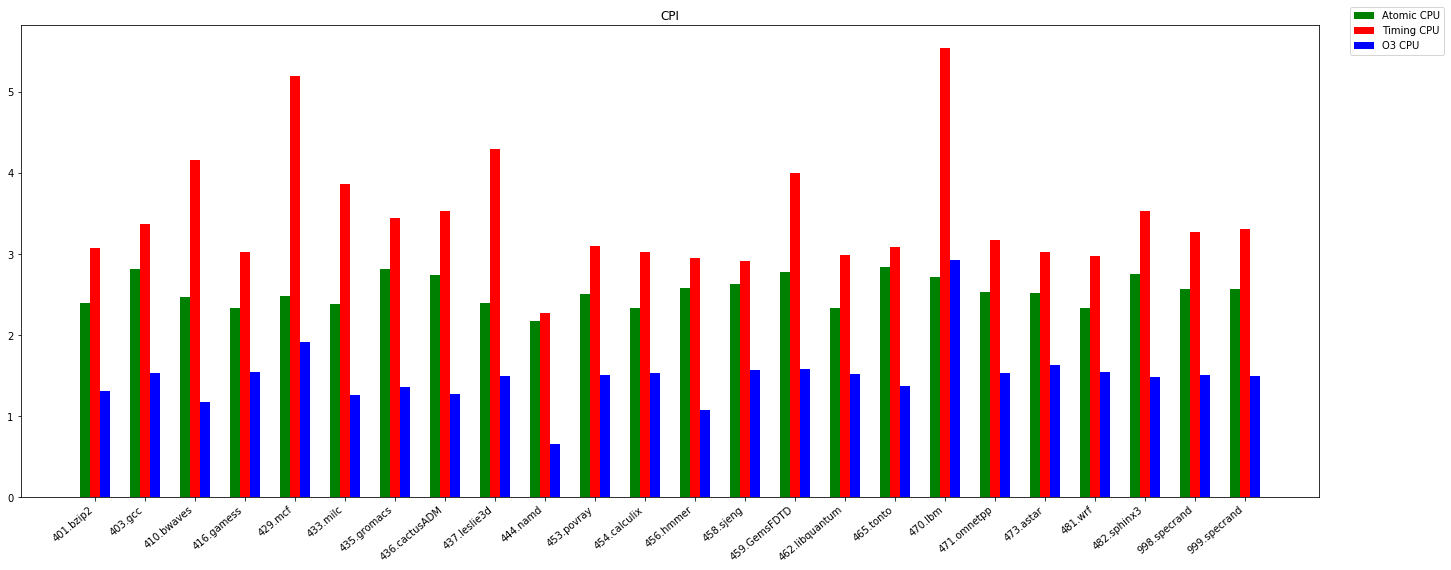

In [68]:
stat = 'cpi'
plt.figure()
plt.figure(figsize=(20,8))
plot_title = 'CPI'
N = np.arange(len(o3_benchmarks))
barwidth = 0.2
displacement1 = N + barwidth
displacement2 = displacement1 + barwidth
plt.bar(N,df_atomic[stat], barwidth, color = 'green', label='Atomic CPU')
plt.bar(displacement1,df_timing[stat],barwidth, color = 'red', label='Timing CPU')
plt.bar(displacement2,df_o3[stat],barwidth, color = 'blue', label='O3 CPU')
plt.xticks(N+0.2, o3_benchmarks, rotation=40, ha='right')
plt.title(plot_title)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
plt.savefig(plotdir + 'cpi_all' + '.png', format='png', dpi=600)

<Figure size 432x288 with 0 Axes>

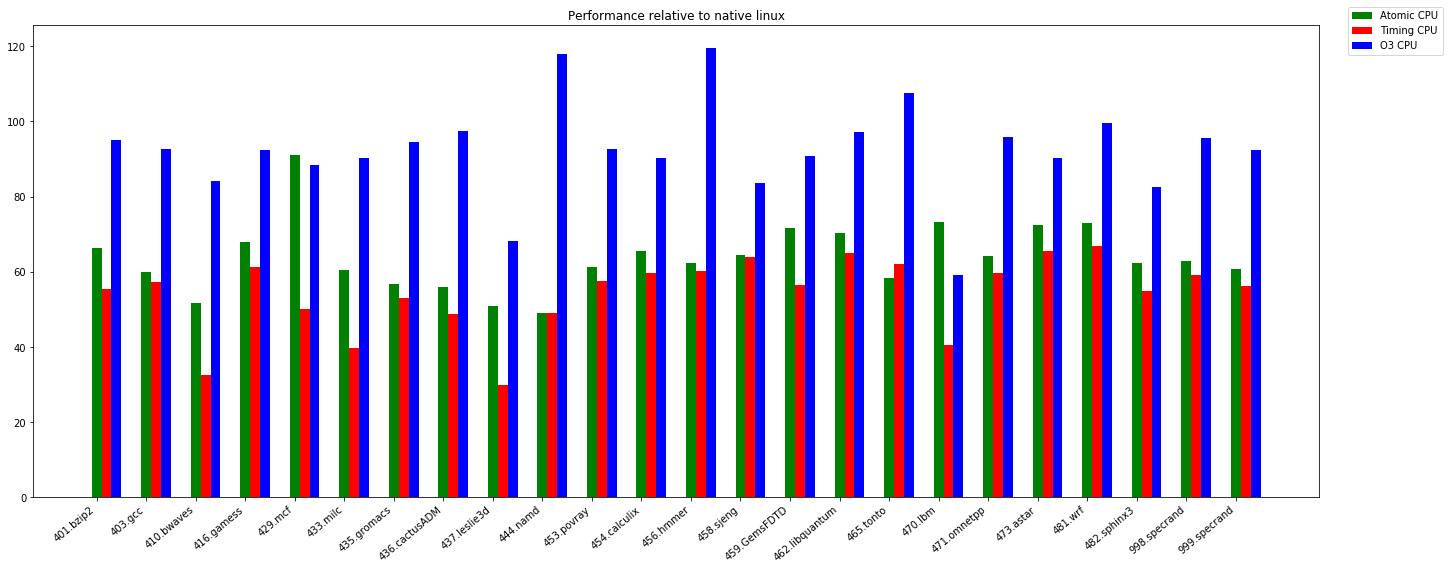

In [69]:
stat = 'sim_time'
df_atomic['perf'] = (df_kvm[stat]/df_atomic[stat])*100
df_timing['perf'] = (df_kvm[stat]/df_timing[stat])*100
df_o3['perf'] = (df_kvm[stat]/df_o3[stat])*100

stat1 = 'perf'
plt.figure()
plt.figure(figsize=(20,8))
plot_title = 'Performance relative to native linux'
N = np.arange(len(o3_benchmarks))
barwidth = 0.2
displacement1 = N + barwidth
displacement2 = displacement1 + barwidth
plt.bar(N,df_atomic[stat1], barwidth, color = 'green', label='Atomic CPU')
plt.bar(displacement1,df_timing[stat1],barwidth, color = 'red', label='Timing CPU')
plt.bar(displacement2,df_o3[stat1],barwidth, color = 'blue', label='O3 CPU')
plt.xticks(N+0.2, o3_benchmarks, rotation=40, ha='right')
plt.xticks(N, o3_benchmarks, rotation=40, ha='right')
plt.title(plot_title)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
plt.savefig(plotdir + 'perf_all_benchs_bar' + '.png', format='png', dpi=600)

<Figure size 432x288 with 0 Axes>

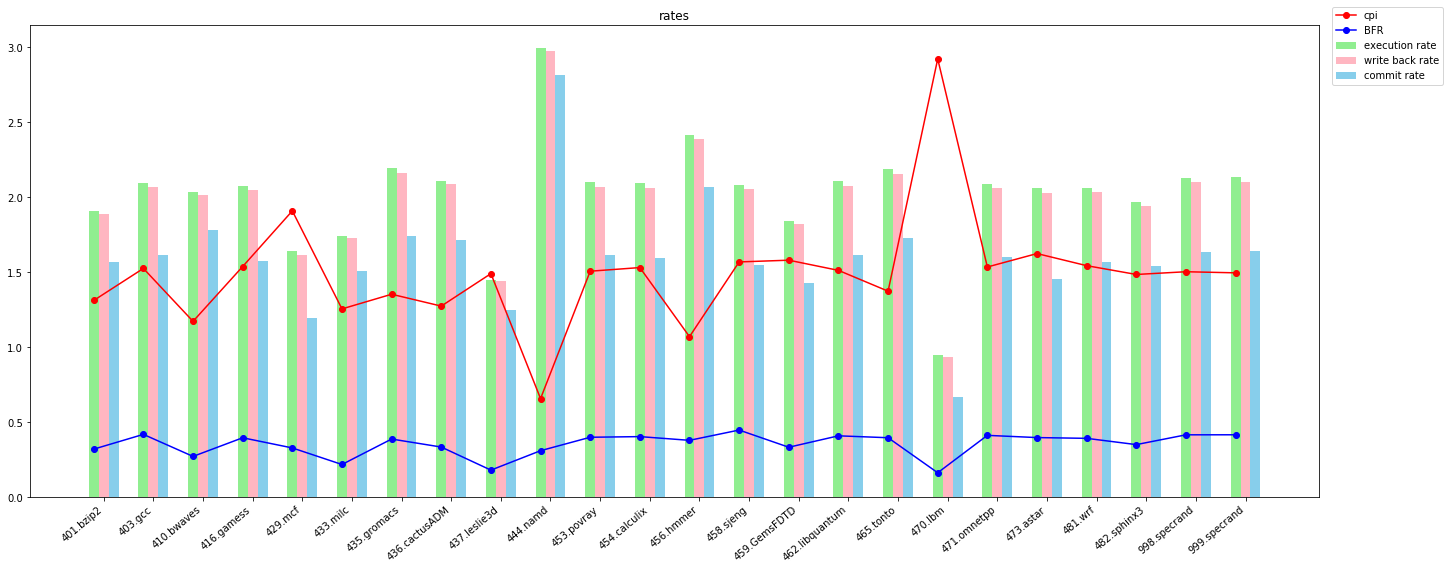

In [111]:
stat1 = 'exec_rate'
stat2 = 'wb_rate'
stat3 = 'commit_rate'
stat4 = 'cpi'
stat5 = 'branchRate'
plt.figure()
plt.figure(figsize=(20,8))
plot_title = 'rates'
N = np.arange(len(o3_benchmarks))
barwidth = 0.2
displacement1 = N + barwidth
displacement2 = displacement1 + barwidth
plt.bar(N,df_o3[stat1], barwidth, color = 'lightgreen', label='execution rate')
plt.bar(displacement1,df_o3[stat2],barwidth, color = 'lightpink', label='write back rate')
plt.bar(displacement2,df_o3[stat3],barwidth, color = 'skyblue', label='commit rate')
plt.plot(N,df_o3[stat4], 'ro-', label='cpi')
plt.plot(N,df_o3[stat5], 'bo-', label='BFR')
plt.xticks(N+0.2, o3_benchmarks, rotation=40, ha='right')
plt.title(plot_title)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
plt.savefig(plotdir + 'rates_all' + '.png', format='png', dpi=600)

<Figure size 432x288 with 0 Axes>

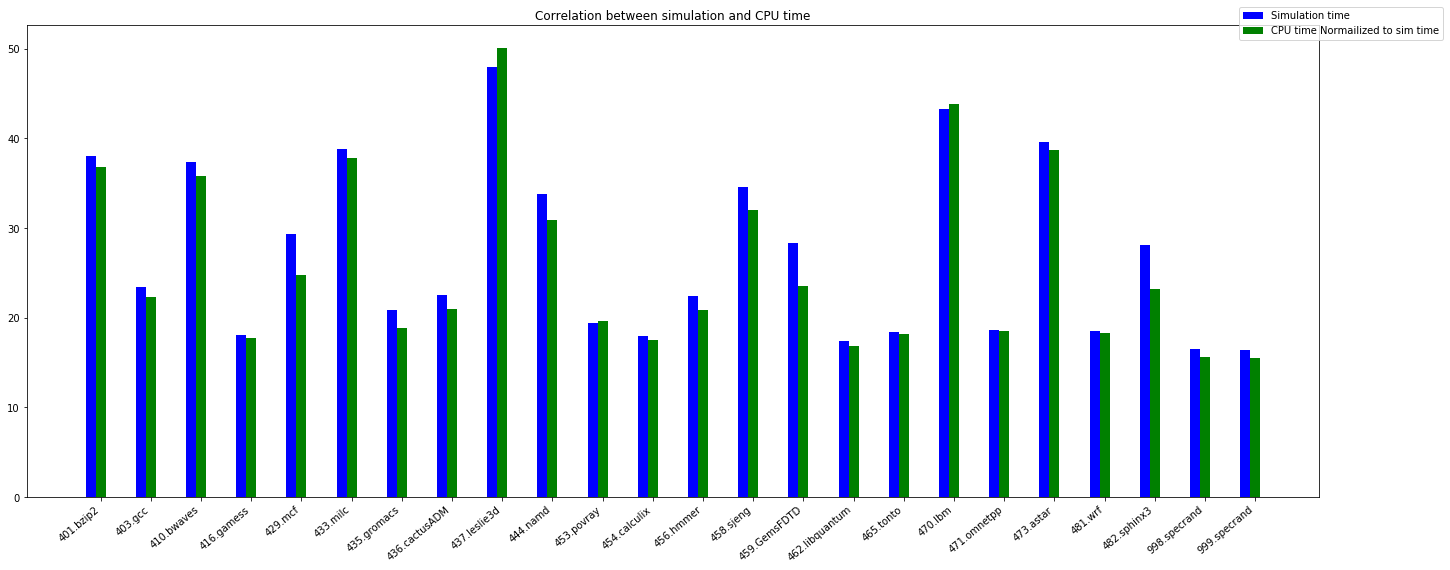

In [109]:
stat1 = 'sim_time'
stat2 = 'cpu_time'

plt.figure()
plt.figure(figsize=(20,8))
plot_title = 'Correlation between simulation and CPU time'
N = np.arange(len(o3_benchmarks))
barwidth = 0.2
displacement1 = N + barwidth
plt.bar(N,df_o3[stat1], barwidth, color = 'blue', label='Simulation time')
plt.bar(displacement1,df_o3[stat2],barwidth, color = 'green', label='CPU time Normailized to sim time')

plt.xticks(N+0.2, o3_benchmarks, rotation=40, ha='right')
plt.title(plot_title)
plt.legend(bbox_to_anchor=(1.1, 1.05))
plt.tight_layout()
plt.savefig(plotdir + 'correlation' + '.png', format='png', dpi=600)

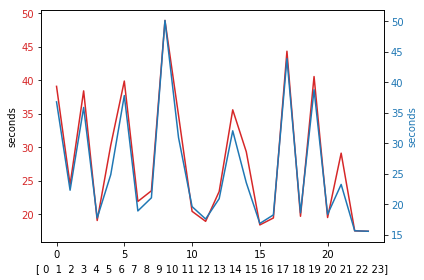

In [118]:
# Create some mock data
stat1 = 'sim_time'
stat2 = 'cpu_time'
N = np.arange(len(o3_benchmarks))

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_ylabel('seconds')
ax1.set_xlabel(N)
ax1.plot(N, df_o3[stat1], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('seconds', color=color)  # we already handled the x-label with ax1
ax2.plot(N, df_o3[stat2], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()